# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
import random
from collections import Counter
from source.textnormalization import TextNormalization
from source.machinelearning import machine_learning_model, fit_model, metrics_values
from source.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_
from source.sentimentinformation import sentiment_percentage, sentiment_counts
from source.wordcloud import wordcloud
from source.most_frequent_word_plot import go_figure, bar_plot
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(40)
tf.random.set_seed(40)

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
Corpus = pd.concat([df1, df2], ignore_index=True)
Corpus.rename(columns={'text': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({'neg': 'Negative', 'pos': 'Positive'})
Corpus.head(5)

,Review,Sentiment
0,"Now, I won't deny that when I purchased this o...",Negative
1,"The saddest thing about this ""tribute"" is that...",Negative
2,Last night I decided to watch the prequel or s...,Negative
3,I have to admit that i liked the first half of...,Negative
4,I was not impressed about this film especially...,Negative


# Sentiment Information

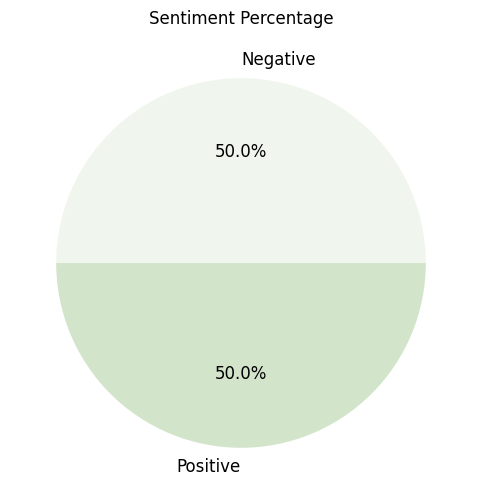

In [5]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

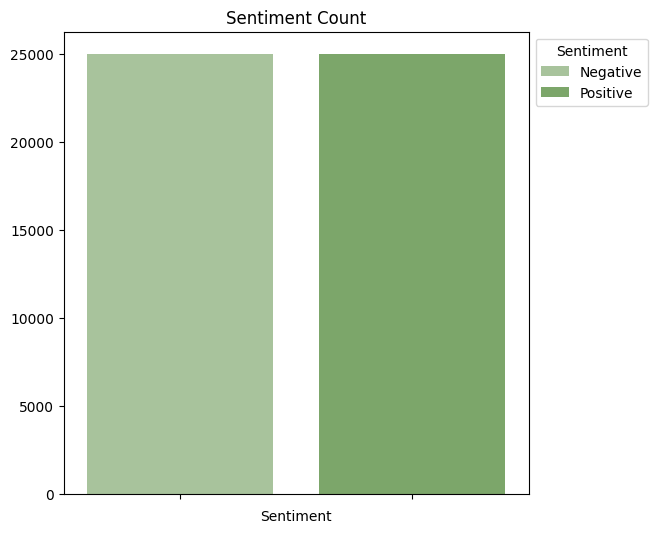

In [6]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [7]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)


In [8]:
Corpus['NumberOfSentences'].sum()

537072

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Text Normalization

In [12]:
text_normalization = TextNormalization(_string_lower = True, 
                        _remove_emojis = True, 
                        _remove_hashtags = False, 
                        _remove_emails = False,
                        _remove_url = True, 
                        _remove_mention = True, 
                        _remove_duplicate_char = True,
                        _remove_single_char = True, 
                        _remove_new_line_char = True, 
                        _remove_number = True, 
                        _remove_html_tags = True, 
                        _remove_special_character = True, 
                        _remove_longest_than = True, 
                        _remove_whitespace = True, 
                        _remove_unicode_characters = True,
                        _stemmer = False, 
                        _remove_non_english = True, 
                        _remove_stop_words = True, 
                        _lemmatizer = True)

In [13]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))
Corpus

,Review,Sentiment,NumberOfSentences,Normalized_Review
0,"Now, I won't deny that when I purchased this o...",Negative,8,deny purchase ebay high expectations incredibl...
1,"The saddest thing about this ""tribute"" is that...",Negative,7,saddest tribute singers include incredibly tal...
2,Last night I decided to watch the prequel or s...,Negative,6,last night decide watch prequel say call prequ...
3,I have to admit that i liked the first half of...,Negative,13,admit like first half sleepers look act story ...
4,I was not impressed about this film especially...,Negative,5,impress film especially go cinema family faith...
...,...,...,...,...
49995,"For one thing, he produced this movie. It has ...",Negative,10,produce movie feel later movies international ...
49996,The title comes from an alteration an adolesce...,Positive,23,title come alteration adolescent inmate correc...
49997,Christopher Nolan's first film is a 'no budget...,Positive,4,christopher nolan first film budget black whit...
49998,The story is shortly about the faith-lacking b...,Negative,11,story shortly faith lack business man priest d...


# Number Of Unique Words

In [14]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

85404

# WordCloud

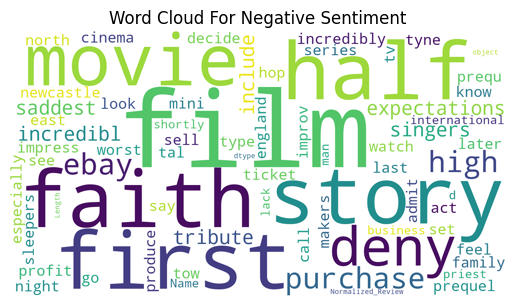

In [15]:
wordcloud(data=Corpus, target='Negative', width=1500, hieght=800, text='Normalized_Review')

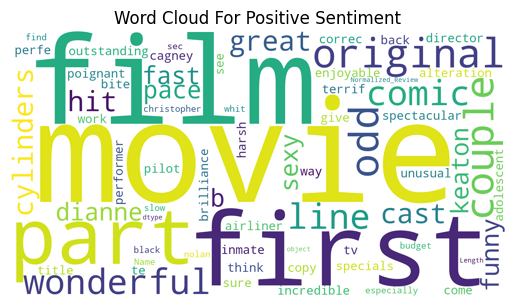

In [16]:
wordcloud(data=Corpus, target='Positive', width=1500, hieght=800, text='Normalized_Review')

# Most Frequent Words 

In [17]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,film,95883
1,movie,87971
2,like,44311
3,see,41665
4,time,31920
5,make,30288
6,character,28361
7,watch,27863
8,think,24483
9,story,23121


In [18]:
go_figure(data=MostFrequentWordDF)

In [19]:
bar_plot(data=MostFrequentWordDF)

# Number Of Words 

In [20]:
Corpus["Number of Words"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

5129594

# Number Of Charachters 

In [21]:
Corpus["Number of Charachters"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters"].sum()

34301984

# Average Number Of Words 

In [22]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

103

# Average Number Of Charachters 

In [23]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

686

# Maximum Number Of Word

In [24]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

1275

# Maximum Number Of Charachters 

In [25]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

7937

# Minimum Number Of Words

In [26]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

3

# Minimum Number Of Charachters 

In [27]:
MinimumNumberOfCharachters = Corpus['Number of Charachters'].min() 
MinimumNumberOfCharachters

17

# Split The Dataset Into X And y

In [28]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']
le = LabelEncoder()
y =le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=33, stratify=y)

# TfidfVectorizer

In [30]:
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid.fit_transform(X_train)
X_test_Tfid = Tfid.transform(X_test)

In [31]:
vocab = Tfid.vocabulary_
vocab

{'time': 64876,
 'see': 57033,
 'film': 22816,
 'maybe': 40203,
 'zabriskie': 72477,
 'point': 49555,
 'felt': 22475,
 'way': 70384,
 'woody': 71598,
 'allen': 1605,
 'like': 37313,
 'year': 72162,
 'period': 48274,
 'realize': 52617,
 'filmmaker': 22850,
 'ahead': 1156,
 'go': 26095,
 'michelangelo': 41352,
 'antonioni': 2637,
 'try': 66362,
 'make': 39066,
 'inside': 32070,
 'red': 52867,
 'desert': 16525,
 'blow': 6896,
 'china': 11113,
 'passenger': 47620,
 'native': 43928,
 'italy': 32870,
 'sense': 57262,
 'learn': 36659,
 'ways': 70398,
 'country': 13931,
 'mastery': 39972,
 'medium': 40696,
 'result': 53795,
 'show': 58266,
 'lack': 35948,
 'mean': 40573,
 'present': 50481,
 'image': 30994,
 'feel': 22396,
 'tone': 65267,
 'color': 12389,
 'sound': 60093,
 'visual': 69640,
 'representation': 53555,
 'era': 20664,
 'director': 17274,
 'job': 33617,
 'state': 61037,
 'disappoint': 17331,
 'admirer': 709,
 'post': 50039,
 'fifties': 22760,
 'work': 71657,
 'say': 56197,
 'avventur

# Machine Learning

**1-Naive Bayes**

In [32]:
Algorithm = MultinomialNB()
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= Naive_Bayes, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.859467
Precision,0.869012
Recall,0.846533
F1Score,0.857625
Error,0.140533


**2-Logistic Regression**

In [33]:
Model = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= Logistic_Regression, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.859467
Precision,0.869012
Recall,0.846533
F1Score,0.857625
Error,0.140533


**3-Decision Tree**

In [34]:
Algorithm = DecisionTreeClassifier(criterion='entropy')
Decisio_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decisio_Tree, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= Decisio_Tree, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.722333
Precision,0.727894
Recall,0.710133
F1Score,0.718904
Error,0.277667


**4-K Nearest Neighbors**

In [35]:
Algorithm =KNeighborsClassifier(metric='cosine', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.778133
Precision,0.746397
Recall,0.842533
F1Score,0.791557
Error,0.221867


**5-Random Forest**

In [36]:
Algorithm = RandomForestClassifier(criterion = 'gini', n_estimators=100)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= Random_Forest, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.854533
Precision,0.855196
Recall,0.853600
F1Score,0.854397
Error,0.145467


**6-SGD Classifier**

In [37]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= SGD, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.889933
Precision,0.877598
Recall,0.906267
F1Score,0.891702
Error,0.110067


**7-Support Vector Machine**

In [38]:
Algorithm = SVC(kernel='linear')
Support_Vector_Machine = machine_learning_model(algorithm=Algorithm)
fit_model(model=Support_Vector_Machine, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= Support_Vector_Machine, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.892067
Precision,0.884832
Recall,0.901467
F1Score,0.893072
Error,0.107933


**8-Multilayer Perceptron**

In [39]:
Algorithm = MLPClassifier(hidden_layer_sizes=16)
MLP = machine_learning_model(algorithm=Algorithm)
fit_model(model=MLP, X_train=X_train_Tfid, y_train=y_train)
metrics_values(model= MLP, X_test=X_test_Tfid, y_test=y_test)

,Values
Accuracy,0.871400
Precision,0.865216
Recall,0.879867
F1Score,0.872480
Error,0.128600


# Deep Learning

In [40]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(X_train)
embedding_dim = 16
vocab_size = len(tokenizer.word_index)
vocab_size

72930

In [41]:
X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_test_seqs = tokenizer.texts_to_sequences(X_test)
max_length =  max([len(x) for x in X_train_seqs])
max_length

1004

In [42]:
encoded_X_train = pad_sequences(X_train_seqs, maxlen=max_length, padding='pre', truncating='pre')
encoded_X_test = pad_sequences(X_test_seqs, maxlen=max_length, padding='pre', truncating='pre')

In [43]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=10
                )

**9-Convolutional Neural Network**

Epoch 1/20
1094/1094 [==============================] - 363s 326ms/step - loss: 0.5743 - accuracy: 0.7053 - val_loss: 0.4061 - val_accuracy: 0.8612
Epoch 2/20
1094/1094 [==============================] - 216s 197ms/step - loss: 0.3889 - accuracy: 0.8498 - val_loss: 0.3330 - val_accuracy: 0.8743
Epoch 3/20
1094/1094 [==============================] - 101s 92ms/step - loss: 0.3250 - accuracy: 0.8757 - val_loss: 0.3035 - val_accuracy: 0.8809
Epoch 4/20
1094/1094 [==============================] - 89s 82ms/step - loss: 0.2813 - accuracy: 0.8964 - val_loss: 0.2909 - val_accuracy: 0.8807
Epoch 5/20
1094/1094 [==============================] - 83s 75ms/step - loss: 0.2554 - accuracy: 0.9072 - val_loss: 0.2887 - val_accuracy: 0.8861
Epoch 6/20
1094/1094 [==============================] - 86s 78ms/step - loss: 0.2307 - accuracy: 0.9178 - val_loss: 0.2865 - val_accuracy: 0.8819
Epoch 7/20
1094/1094 [==============================] - 83s 75ms/step - loss: 0.2158 - accuracy: 0.9230 - val_loss: 0.2

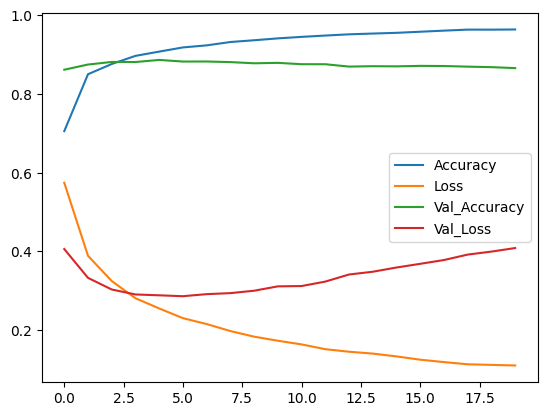

 
The Training Loss is 0.0333, And Training Accuracy is 0.9931
 
The Testing Loss is 0.4087, And Testing Accuracy is 0.8653


In [44]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size, embedding_dim=embedding_dim, max_length=max_length, dropout=0.8, kernel=8, filters=32)
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=20, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**10-LSTM**

Epoch 1/10
1094/1094 [==============================] - 405s 357ms/step - loss: 0.3689 - accuracy: 0.8336 - val_loss: 0.2935 - val_accuracy: 0.8811
Epoch 2/10
1094/1094 [==============================] - 228s 208ms/step - loss: 0.1886 - accuracy: 0.9326 - val_loss: 0.3282 - val_accuracy: 0.8745
Epoch 3/10
1094/1094 [==============================] - 185s 169ms/step - loss: 0.1169 - accuracy: 0.9592 - val_loss: 0.3564 - val_accuracy: 0.8780
Epoch 4/10
1094/1094 [==============================] - 172s 157ms/step - loss: 0.0850 - accuracy: 0.9718 - val_loss: 0.4062 - val_accuracy: 0.8683
Epoch 5/10
1094/1094 [==============================] - 164s 150ms/step - loss: 0.0563 - accuracy: 0.9811 - val_loss: 0.5664 - val_accuracy: 0.8682
Epoch 6/10
1094/1094 [==============================] - 169s 154ms/step - loss: 0.0428 - accuracy: 0.9859 - val_loss: 0.6002 - val_accuracy: 0.8689
Epoch 7/10
1094/1094 [==============================] - 173s 158ms/step - loss: 0.0340 - accuracy: 0.9896 - val_

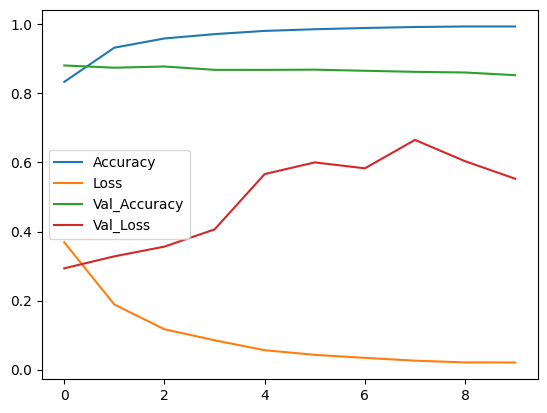

 
The Training Loss is 0.0260, And Training Accuracy is 0.9932
 
The Testing Loss is 0.5530, And Testing Accuracy is 0.8529


In [45]:
LSTM = lstm_(vocab_size= vocab_size, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')